> <div style="font-size: 22px; color: #43766C;"> What is YOLOv8? </div>

<div style="font-size: 16px; color: #E7D4B5;"> YOLOv8 is a new state-of-the-art computer vision model built by Ultralytics, the creators of YOLOv5. The YOLOv8 model contains out-of-the-box support for object detection, classification, and segmentation tasks, accessible through a Python package as well as a command line interface. </div>

In [1]:
import os
from IPython.display import Video
Video("/kaggle/input/speed-and-traffic-sign-detection-test/output2.mp4", width=960, embed=True)

> <div style="font-size: 22px; color: #43766C;"> Evolution of Yolo: From Yolo V1 to Yolo V8 </div>

<div style="font-size: 16px; color: #E7D4B5;">The YOLO (You Only Look Once) series has evolved rapidly. YOLOv1, launched in 2016, pioneered real-time object detection with a single neural network. YOLOv2 improved accuracy with anchor boxes and expanded category detection. YOLOv3 enhanced performance with residual blocks and multi-scale predictions. YOLOv4, introduced in 2020, balanced speed and accuracy with new optimizations. YOLOv5, developed by Ultralytics, focused on modularity and efficiency. YOLOv6 and YOLOv7 further refined accuracy and efficiency, while YOLOv8, the latest version, delivers cutting-edge real-time detection performance, continually building on previous innovations.</div>

<a href="https://ibb.co/4dvv3W0"><img src="https://i.ibb.co/JQ66gnS/history-of-yolo-generated.webp" alt="history-of-yolo-generated" border="0"></a>

> <div style="font-size: 22px; color: #43766C;">Yolo V8 performance and accuracy analysis</div>

<div style="font-size: 16px; color: #E7D4B5;">It’s incredible how accurate and efficient Yolo V8 is at executing object identification tasks. Unlike most other algorithms, it can process both still photos and moving video in real time. It is ideal for a wide range of applications due to the accuracy of the bounding box predictions it generates. </div>

<a href="https://ibb.co/rcDWpCz"><img src="https://i.ibb.co/2sGbMDC/yolo-comparison-plots.png" alt="yolo-comparison-plots" border="0"></a>

> <div style="font-size: 22px; color: #43766C;">Yolo V8 additional resources:</div>
<div style="font-size: 18px; color: #E7D4B5;">
    
Those who wish to learn more about it can see 
the official documentation: https://docs.ultralytics.com/

And there youtube: https://youtube.com/@Ultralytics?si=UzO-CDpDfCnNqJKz
    
 Notebook to explain Yolov3: 
    [YOLO v3: Real-Time Object Detection Magic ✨🎯](https://www.kaggle.com/code/gannayasser/yolo-v3-real-time-object-detection-magic)
 </div>

<div style="font-size: 18px; color: #9CA986;"> Install Required Packages </div>

In [2]:
!pip install ultralytics

# <div style="font-size: 20px; color: #D6BD98;"> 01. Import Libraries </div>

In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# <div style="font-size: 20px; color: #D6BD98;"> 02.Load and Display Data </div>

In [4]:
# Path to the images directory
image_dir = "/kaggle/input/cardetection/car/train/images"

In [5]:
image_files = os.listdir(image_dir)
label_files = os.listdir('/kaggle/input/cardetection/car/train/labels')
print(f"Total number of images: {len(image_files)}")
print(f"Total number of labels: {len(label_files)}")

Total number of images: 3530
Total number of labels: 3530


In [6]:
image_files = sorted(os.listdir(image_dir))
random_image_file = random.choice(image_files)
img_path = os.path.join(image_dir, random_image_file)
image = Image.open(img_path)

# Get size and channels
width, height = image.size
mode = image.mode  # 'RGB' for color, 'L' for grayscale, etc.

print(f"Size: {width} x {height}")
print(f"Mode: {mode}")

Size: 416 x 416
Mode: RGB


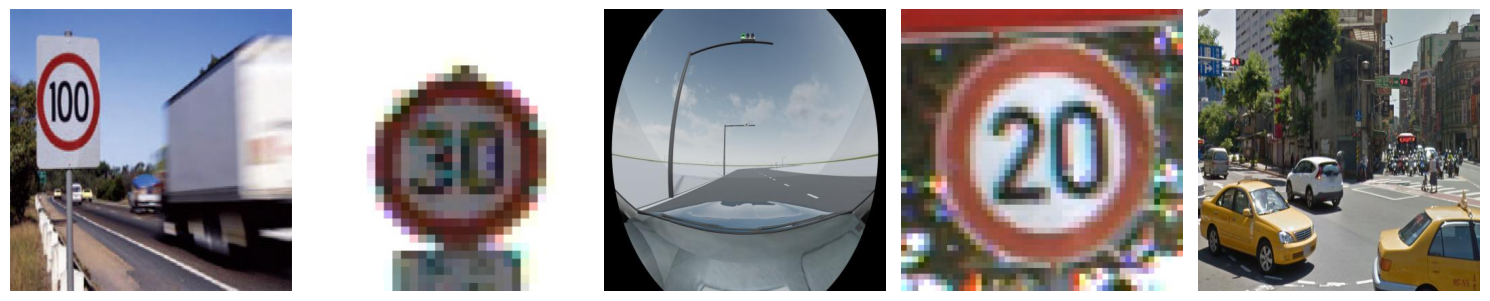

In [7]:
# Get a list of image files
image_files = sorted(os.listdir(image_dir))
random.shuffle(image_files)  # Shuffle the list for randomness

# Select the first 5 random images
image_files = image_files[:5]

# Plot images
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(image_files):
    # Full path to the image
    img_path = os.path.join(image_dir, img_file)
    
    # Load the image
    image = Image.open(img_path)
    
    # Plot the image
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(image)
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

# <div style="font-size: 20px; color: #D6BD98;"> 03.Initialize and Train YOLO Model </div>

In [8]:
# Load a pre-trained YOLO model
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(
    data="/kaggle/input/cardetection/car/data.yaml", 
    epochs=30,                                         
    batch=-1,                                           
    optimizer='auto'                                   
)


Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

2024-08-25 17:52:54,847	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-25 17:52:55,063	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Currently logged in as: gana09890 (gana09890-canadian-international-school). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.89G total, 0.10G reserved, 0.07G allocated, 15.72G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.201         26.25         37.55        (1, 3, 640, 640)                    list
     3013773       16.42         0.298         22.99         31.67        (2, 3, 640, 640)                    list
     3013773       32.84         0.596         25.04         45.33        (4, 3, 640, 640)                    list
     3013773       65.67         1.082         23.94         35.13        (8, 3, 640, 640)                    list
     3013773       131.3         2.330         35.41         56.39       (16, 3, 640, 640)                

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:04<00:00, 734.44it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 698.34it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.04G     0.8867      3.791      1.216         74        640: 100%|██████████| 54/54 [00:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        801        944     0.0408      0.773      0.132      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.36G     0.7279      2.638      1.085         73        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.312      0.427       0.33      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.32G     0.7332      2.193      1.078         53        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        801        944      0.519      0.525      0.543      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.32G     0.7299      1.864      1.076         72        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.642      0.559      0.613      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.36G     0.6993      1.556      1.053         73        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        801        944      0.762      0.692      0.761      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.32G     0.6721      1.359      1.035         53        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        801        944      0.751       0.71       0.79      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.32G      0.662      1.251      1.027         63        640: 100%|██████████| 54/54 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.829      0.737       0.83      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.33G     0.6423      1.102      1.012         69        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        801        944       0.83      0.792      0.868      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.32G      0.627      1.044      1.006         71        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        801        944      0.894      0.752       0.86      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.32G     0.6234     0.9908      1.006         73        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.872      0.784      0.876      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.38G     0.6173     0.9516      1.003         73        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        801        944      0.887      0.798       0.89      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.38G      0.606     0.8989     0.9893         67        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        801        944      0.927      0.798      0.901      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.36G     0.6004     0.8432     0.9886         68        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.885      0.831      0.905      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.32G     0.5886     0.8265     0.9873         72        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        801        944      0.953      0.823      0.919      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.36G     0.5883     0.8034     0.9863         74        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        801        944       0.91      0.822      0.918      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.32G     0.5681     0.7778      0.978         73        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.921      0.819       0.91      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.38G     0.5663     0.7499     0.9743         64        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        801        944      0.933      0.839       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.32G     0.5626     0.7268     0.9744         71        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.888      0.864       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.32G     0.5589     0.7136     0.9666         59        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        801        944      0.941      0.861      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.38G      0.545     0.6718     0.9621         69        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        801        944      0.952      0.868      0.945      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.89G     0.5577     0.5303     0.9366         41        640: 100%|██████████| 54/54 [00:38<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.943      0.854      0.937        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.26G     0.5461     0.4959       0.93         46        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944      0.951      0.874      0.947      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.26G     0.5362     0.4673     0.9356         35        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.957       0.88      0.953      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.26G     0.5286     0.4574     0.9255         36        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.951      0.894      0.948      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.36G     0.5266     0.4359      0.919         41        640: 100%|██████████| 54/54 [00:34<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.929      0.894      0.952      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.29G     0.5161     0.4237     0.9136         37        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.927      0.912       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.26G     0.5052     0.4022     0.9119         43        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944      0.948      0.892      0.955       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.29G     0.4976     0.3866     0.9126         42        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        801        944      0.947      0.897      0.955      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.26G      0.496     0.3829     0.9062         42        640: 100%|██████████| 54/54 [00:34<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        801        944      0.946      0.897      0.956       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.26G     0.4869     0.3695     0.9053         39        640: 100%|██████████| 54/54 [00:34<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944      0.952      0.897      0.959      0.831



30 epochs completed in 0.353 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]


                   all        801        944      0.952      0.897      0.959      0.832
           Green Light         87        122      0.888      0.705       0.84      0.508
             Red Light         74        108      0.852      0.692      0.814      0.513
       Speed Limit 100         52         52      0.935      0.942      0.989      0.899
       Speed Limit 110         17         17      0.858      0.941      0.976      0.913
       Speed Limit 120         60         60      0.983      0.962      0.991      0.913
        Speed Limit 20         56         56      0.988      0.982      0.986      0.866
        Speed Limit 30         71         74      0.974      0.959      0.982      0.909
        Speed Limit 40         53         55      0.959      0.964       0.99      0.887
        Speed Limit 50         68         71      0.984      0.857       0.96      0.863
        Speed Limit 60         76         76      0.986      0.914      0.972      0.883
        Speed Limit 7

# <div style="font-size: 20px; color: #D6BD98;"> 04.Evaluate the Model </div>



<div style="font-size: 18px; color: #9CA986;"> 4.1 Confusion Matrix </div>

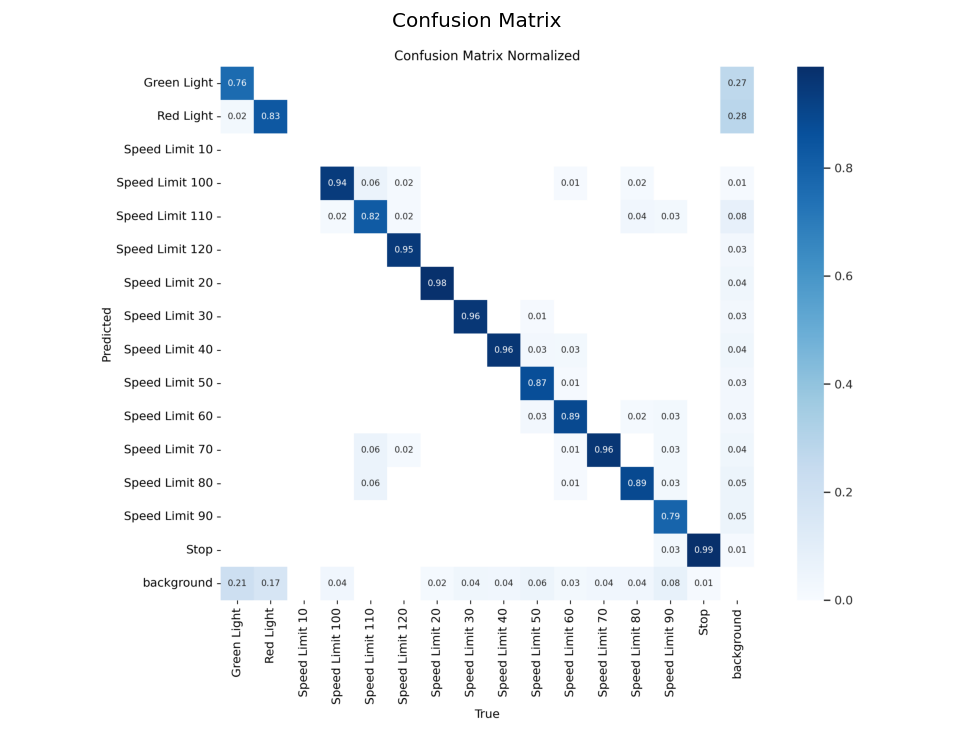

In [9]:
def display_confusion_matrix(post_training_files_path, cm_image_file):
    image_path = os.path.join(post_training_files_path, cm_image_file)
    
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print(f"File {cm_image_file} not found at {post_training_files_path}")

# Path to the directory containing the image
post_training_files_path = '/kaggle/working/runs/detect'

# Filename of the confusion matrix image
cm_image_file = '/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'

# Display the confusion matrix
display_confusion_matrix(post_training_files_path, cm_image_file)

<div style="font-size: 18px; color: #9CA986;"> 4.2 Report </div>


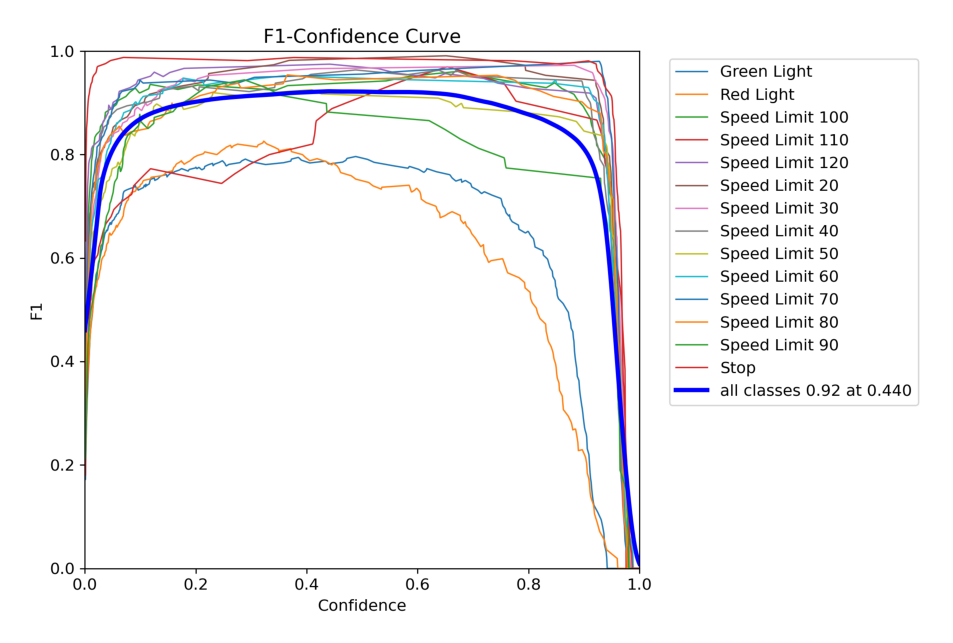

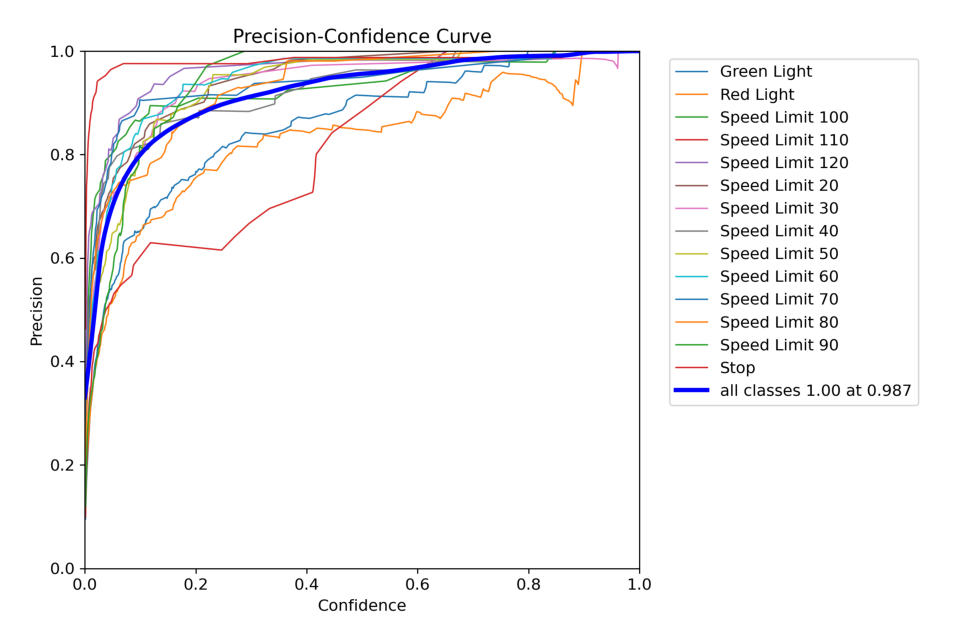

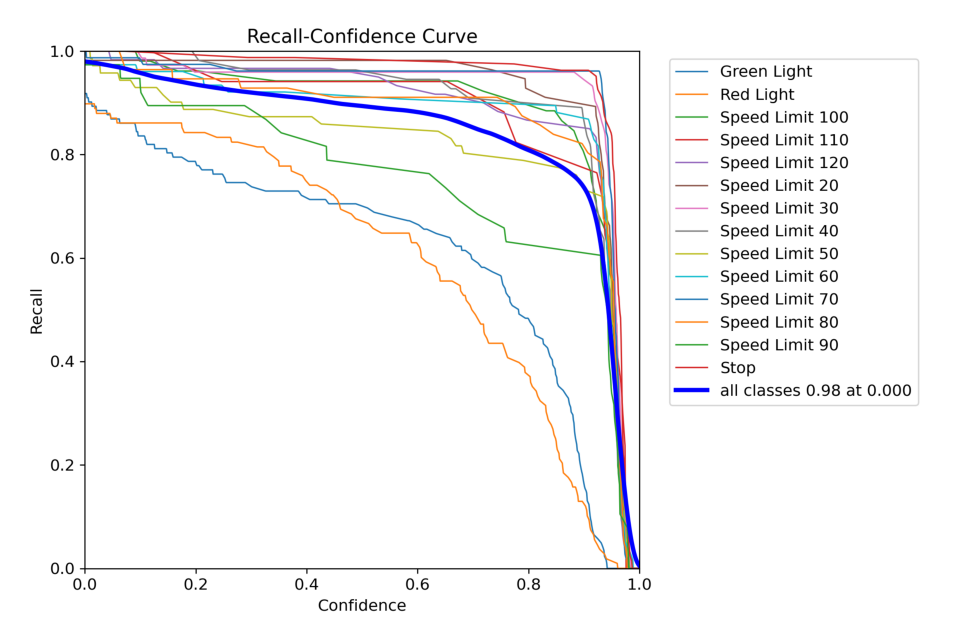

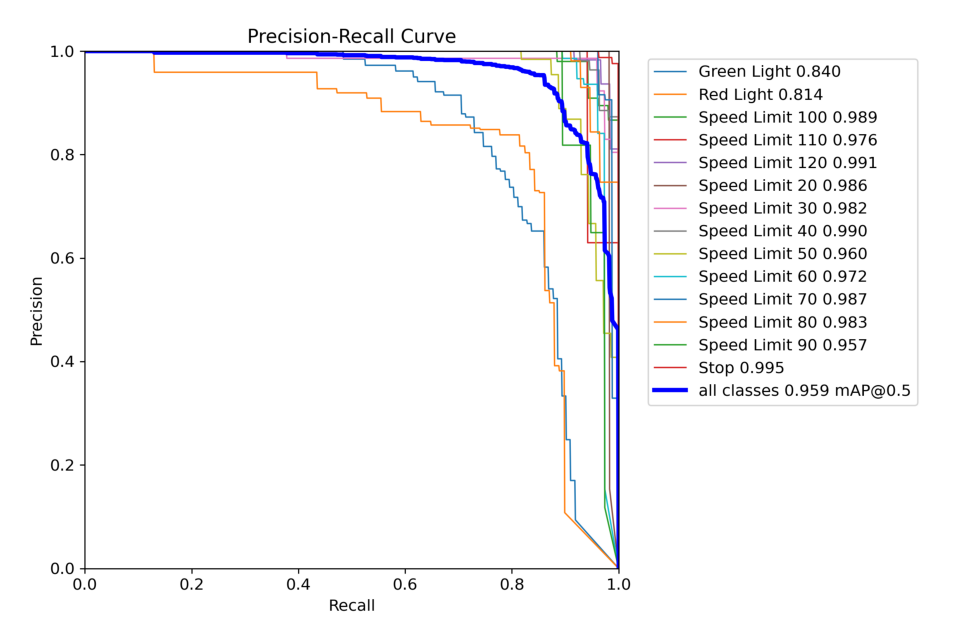

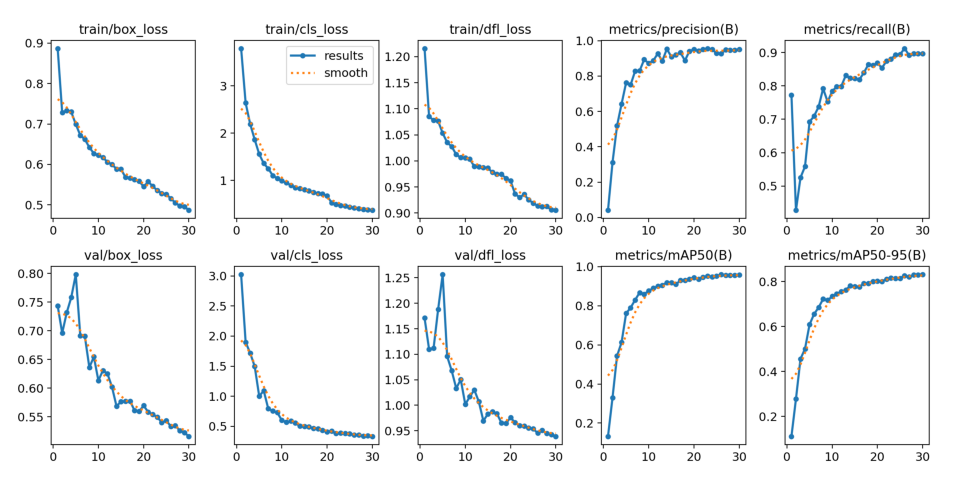

In [10]:

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]


post_training_files_path = '/kaggle/working/runs/detect/train'
display_images(post_training_files_path, image_files)

In [11]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(15)

epoch        train/box_loss        train/cls_loss  \
15                    16               0.56805               0.77776   
16                    17               0.56631               0.74989   
17                    18               0.56263               0.72685   
18                    19               0.55885               0.71361   
19                    20               0.54502               0.67181   
20                    21               0.55771               0.53027   
21                    22               0.54611               0.49590   
22                    23               0.53616               0.46734   
23                    24               0.52857               0.45736   
24                    25               0.52665               0.43589   
25                    26               0.51608               0.42370   
26                    27               0.50523               0.40222   
27                    28               0.49759               0.38661   
28                    29               0.49601               0.38294   
29                    30               0.48685               0.36954   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
15               0.97798               0.92120               0.81865   
16               0.97428               0.93329               0.83934   
17               0.97440               0.88779               0.86419   
18               0.96660               0.94108               0.86142   
19               0.96209               0.95153               0.86847   
20               0.93665               0.94319               0.85378   
21               0.93002               0.95077               0.87413   
22               0.93558               0.95653               0.88018   
23               0.92551               0.95097               0.89368   
24               0.91900               0.92878               0.89419   
25               0.91365               0.92711               0.91235   
26               0.91188               0.94795               0.89217   
27               0.91262               0.94731               0.89716   
28               0.90623               0.94635               0.89657   
29               0.90532               0.95155               0.89722   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
15               0.90953               0.77548               0.57715   
16               0.92966               0.79157               0.57749   
17               0.93011               0.79220               0.56068   
18               0.93625               0.79950               0.55959   
19               0.94490               0.80245               0.56941   
20               0.93665               0.80024               0.55839   
21               0.94687               0.81079               0.55420   
22               0.95293               0.81605               0.54946   
23               0.94812               0.81451               0.54029   
24               0.95219               0.81440               0.54332   
25               0.95982               0.82636               0.53354   
26               0.95508               0.82016               0.53474   
27               0.95534               0.82919               0.52558   
28               0.95637               0.82992               0.52233   
29               0.95861               0.83098               0.51588   

            val/cls_loss          val/dfl_loss                lr/pg0  \
15               0.49100               0.98733              0.000266   
16               0.46644               0.98358              0.000248   
17               0.46014               0.96525              0.000231   
18               0.43293               0.96439              0.000214   
19               0.40701               0.97624              0.000196   
20               0.41923               0.96587              0.000179   
21               0.38360               0.96022          

In [12]:
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 705.89it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.04it/s]


                   all        801        944      0.952      0.898      0.959      0.833
           Green Light         87        122      0.896      0.709      0.842      0.512
             Red Light         74        108      0.852      0.692      0.814      0.514
       Speed Limit 100         52         52      0.935      0.942      0.988      0.901
       Speed Limit 110         17         17      0.855      0.941      0.976      0.913
       Speed Limit 120         60         60      0.983      0.963      0.991      0.917
        Speed Limit 20         56         56      0.988      0.982      0.986      0.867
        Speed Limit 30         71         74      0.974      0.959      0.982      0.909
        Speed Limit 40         53         55      0.959      0.964       0.99      0.885
        Speed Limit 50         68         71      0.984      0.857      0.961      0.862
        Speed Limit 60         76         76      0.986      0.914      0.972      0.885
        Speed Limit 7

# <div style="font-size: 20px; color: #D6BD98;"> 05. Test Model </div>


0: 640x640 1 Speed Limit 20, 13.8ms
Speed: 4.3ms preprocess, 13.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


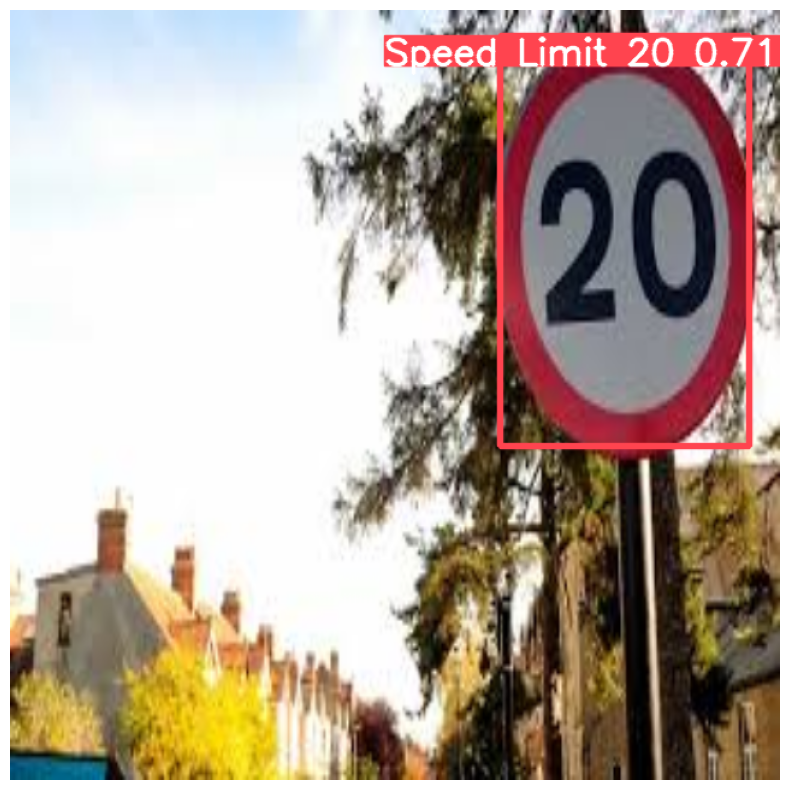

In [18]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/speed-and-traffic-sign-detection-test'
valid_images_path = dataset_path  # Directly point to the root directory

# List of all jpg and jpeg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg') or file.endswith('.jpeg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(valid_images_path, selected_image)

    # Load image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is not None:
        # Resize image
        resized_image = resize_image(image, size=(640, 640))
        # Normalize image
        normalized_image = normalize_image(resized_image)
        
        # Convert the normalized image to uint8 data type
        normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
        
        # Predict with the model
        results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
        
        # Plot image with thicker bounding box
        annotated_image = results[0].plot(line_width=3)  # Increased line width for thicker bounding box
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_image_rgb)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to load image {image_path}")
else:
    print("No images found in the directory.")


# <div style="font-size: 20px; color: #D6BD98;"> 06. Real Time Video </div>

In [14]:
!ffmpeg -y -loglevel panic -i "/kaggle/input/speed-and-traffic-sign-detection-test/test video.mp4" output.mp4
from IPython.display import Video

# Display the converted video
Video("output.mp4", width=960)


In [15]:
# Predict using the model with streaming to handle large videos
results = Valid_model.predict(source="/kaggle/input/speed-and-traffic-sign-detection-test/test video.mp4", stream=True, save=True)

In [16]:
# Display the video 
Video("/kaggle/input/speed-and-traffic-sign-detection-test/output2.mp4", width=960, embed=True)